In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from tensorflow.keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Model definition

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

/home/alex/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training

In [4]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=10,
    batch_size=1000)

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4974 - loss: 1.7004
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6700 - loss: 1.2100
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7086 - loss: 1.0458
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.7312 - loss: 0.9472
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.7479 - loss: 0.8778
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.7609 - loss: 0.8220
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7735 - loss: 0.7779
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7808 - loss: 0.7437
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.7851 - loss: 0.7180
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7900 - loss: 0.6955


Model evaluation

In [6]:
model.evaluate(X_test.reshape(-1, 784), y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7795 - loss: 0.7065


[0.7064810395240784, 0.7795000076293945]

In [7]:
model.predict(X_test.reshape(-1, 784))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


array([[0.16095324, 0.1356725 , 0.27140662, ..., 0.81483114, 0.5268889 ,
        0.9496571 ],
       [0.5375729 , 0.21268791, 0.9539282 , ..., 0.18098465, 0.29488775,
        0.230185  ],
       [0.47873032, 0.9818917 , 0.3328095 , ..., 0.2755539 , 0.14569588,
        0.1934554 ],
       ...,
       [0.671782  , 0.1629776 , 0.1667943 , ..., 0.24515478, 0.8374652 ,
        0.3203622 ],
       [0.32689306, 0.9761129 , 0.23395453, ..., 0.2730228 , 0.0728884 ,
        0.19953613],
       [0.15831359, 0.08323013, 0.2594752 , ..., 0.93111193, 0.796506  ,
        0.5921058 ]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


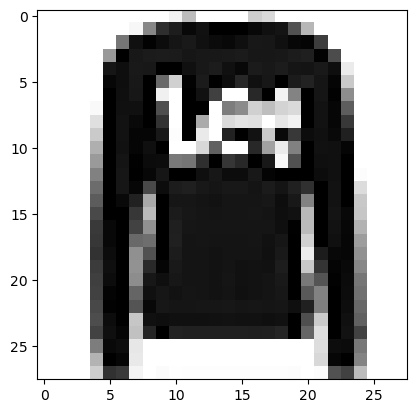

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1], cmap="gray_r")
plt.show()

In [9]:
pred = model.predict(X_test.reshape(-1, 784))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [10]:
import numpy as np

np.argmax(pred[1])

np.int64(2)

In [11]:
np.argmax(pred, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [12]:
import pandas as pd

ytrue = pd.Series(np.argmax(y_test, axis = 1), name = 'actual')
ypred = pd.Series(np.argmax(pred, axis = 1), name = 'pred')

pd.crosstab(ytrue, ypred)

pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,793,8,16,72,10,4,78,0,19,0
1,9,926,17,36,7,0,3,0,2,0
2,16,1,636,13,194,1,120,0,19,0
3,57,11,11,834,36,0,44,0,7,0
4,2,5,139,53,691,0,101,0,9,0
5,1,0,0,4,0,777,0,125,10,83
6,224,3,143,54,118,2,416,0,40,0
7,0,0,0,0,0,37,0,874,0,89
8,1,1,15,18,5,3,25,8,923,1
